
# Notas del notebook

Hemos seguido las indicaciones de <https://www.practicaldatascience.org/html/jupyter_r_notebooks.html> para poder usar R en un jupyter desde Visual Studio Code.

Aprendizaje Estadístico, Máster en Tecnologías de Análisis de Datos Masivos: Big Data. Profesor: Juan A. Botía (juanbot@um.es)

08/11/2021

# Introduction

In this lab, we explore the resampling techniques covered in the 8th week of the subject. All the material is directly extracted from this [Book](https://link.springer.com/book/10.1007/978-1-0716-1418-1) of reference for this course. An early version of the pdf can be downloaded from Hastie´s web page at Stanford [here](https://web.stanford.edu/~hastie/pub.htm#books). Within the book, please see section 5.3.

Remember the methods we went through at the classroom, (1) the validation set, (2) the leave-one-out and (3) k-fold cross-validation. We´ll see them now.

# The validation set approach

We explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the Auto data set.

Before we begin, we use the set.seed() function in order to set a seed for seed R’s random number generator, so that the reader of this book will obtain precisely the same results as those shown below. **It is generally a good idea
to set a random seed when performing an analysis such as cross-validation
that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time**.

We begin by using the `sample()` function to split the set of observations
into two halves, by selecting a random subset of 196 observations out of sample() the original 392 observations. We refer to these observations as the training
set.



In [33]:


library(ISLR2)
data(Auto)
str(Auto)
set.seed (1)
train <- sample(392, 196)



'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 - attr(*, "na.action")= 'omit' Named int  33 127 331 337 355
  ..- attr(*, "names")= chr  "33" "127" "331" "337" ...



(Here we use a shortcut in the sample command; see ?sample for details.) 

We are going to be interested on the possible association between the `horsepower` and the `mpg` (miles per gallon). Let us plot them


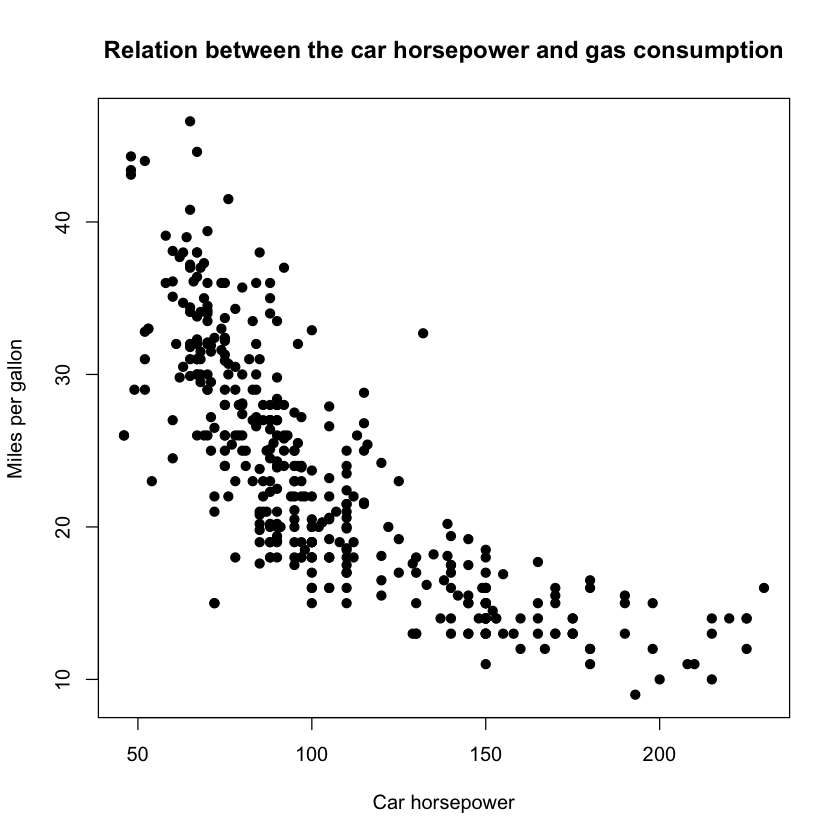

In [34]:


plot(x=Auto$horsepower,y=Auto$mpg,pch=19,xlab="Car horsepower",ylab="Miles per gallon",
    main="Relation between the car horsepower and gas consumption")





There is clearly a relation between the two. maybe not linear, but this is not the point of the discussion today.

We will now use the `subset` option in `lm()` to fit a linear regression using only the observations corresponding to the training set.


In [35]:


lm.fit <- lm(mpg ~  horsepower, data = Auto, subset = train)




We now use the `predict()` function to estimate the response for all 392 observations, and we use the `mean()` function to calculate the MSE of the 196 observations in the validation set. Note that the `-train` index below selects only the observations that are not in the training set.



In [36]:

attach(Auto)
mean((mpg - predict(lm.fit, Auto))[-train]^2)


The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year


The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year




[1] 23.26601


Therefore, the estimated test MSE for the linear regression fit is 23.27. We can use the `poly()` function to estimate the test error for the quadratic and cubic regressions.


In [37]:


lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto, subset = train)
mean((mpg - predict(lm.fit2, Auto))[-train]^2)
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto,subset = train)
mean((mpg - predict(lm.fit3, Auto))[-train]^2)


[1] 18.71646

[1] 18.79401


These error rates are 18.72 and 18.79, respectively. If we choose a different training set instead, then we will obtain somewhat different errors on the validation set.


In [38]:

set.seed (2)
train <- sample(392, 196)
lm.fit <- lm(mpg ~ horsepower, subset = train)
mean((mpg - predict(lm.fit, Auto))[-train]^2)
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto,subset = train)
mean((mpg - predict(lm.fit2, Auto))[-train]^2)
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto,subset = train)
mean((mpg - predict(lm.fit3, Auto))[-train]^2)


[1] 25.72651

[1] 20.43036

[1] 20.38533


Using this split of the observations into a training set and a validation set, we find that the validation set error rates for the models with linear, quadratic, and cubic terms are 25.73, 20.43, and 20.39, respectively.
These results are consistent with our previous findings: a model that predicts mpg using a quadratic function of horsepower performs better than a model that involves only a linear function of horsepower, and there is little evidence in favor of a model that uses a cubic function of horsepower. If we plot it


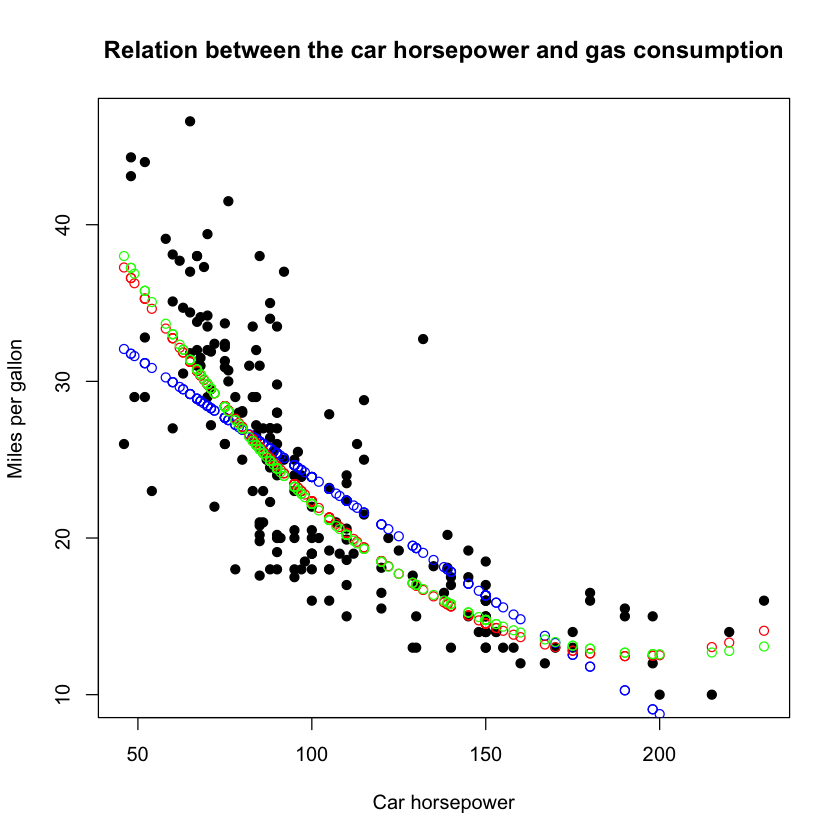

In [39]:

plot(x=Auto$horsepower[-train],y=Auto$mpg[-train],pch=19,xlab="Car horsepower",
     ylab="Miles per gallon",
     main="Relation between the car horsepower and gas consumption")

points(x=Auto$horsepower[-train],y=predict(lm.fit, Auto[-train,]),col="blue")
points(x=Auto$horsepower[-train],y=predict(lm.fit2, Auto[-train,]),col="red")
points(x=Auto$horsepower[-train],y=predict(lm.fit3, Auto[-train,]),col="green")



# Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the glm() and cv.glm() functions. 

We have used the glm() function before to perform logistic regression by passing in the family = "binomial" argument. But if we use glm() to fit a model without passing in the family argument, then it performs linear regression, just like the lm() function. So for instance,



In [40]:

glm.fit <- glm(mpg ~ horsepower, data = Auto)
coef(glm.fit)


(Intercept)  horsepower 
 39.9358610  -0.1578447


and this is it

In markdow


In [41]:

lm.fit <- lm(mpg ~ horsepower, data = Auto)
coef(lm.fit)


(Intercept)  horsepower 
 39.9358610  -0.1578447



yield identical linear regression models. In this lab, we will perform linear regression using the glm() 
function rather than the lm() function because the former can be used together with cv.glm(). The cv.glm() function is part of the boot library.


In [42]:

library(boot)
glm.fit <- glm(mpg ~ horsepower, data = Auto)
cv.err <- cv.glm(Auto , glm.fit)
cv.err$delta


[1] 24.23151 24.23114



The cv.glm() function produces a list with several components. 



In [43]:

str(cv.err)


List of 4
 $ call : language cv.glm(data = Auto, glmfit = glm.fit)
 $ K    : num 392
 $ delta: num [1:2] 24.2 24.2
 $ seed : int [1:626] 10403 292 241038711 -724551010 -982165160 -1828904773 1219649113 639708648 -249104362 -1532738671 ...




The two numbers in the delta vector contain the cross-validation results. In this case the numbers are identical (up to two decimal places) and correspond to the LOOCV statistic given in (5.1). Below, we discuss a situation in which the two numbers differ. Our cross-validation estimate for the test error is approximately 24.23.

We can repeat this procedure for increasingly complex polynomial fits. To automate the process, we use the for() function to initiate a for loop which iteratively fits polynomial regressions for polynomials of order i = 1 to i = 10, computes the associated cross-validation error, and stores it in the ith element of the vector cv.error. We begin by initializing the vector.



In [44]:

cv.error <- rep(0, 10)
for (i in 1:10) {
  glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
  cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
  }
cv.error



[1] 24.23151 19.24821 19.33498 19.42443 19.03321 18.97864 18.83305 18.96115
 [9] 19.06863 19.49093


We see a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using higher-order polynomials.



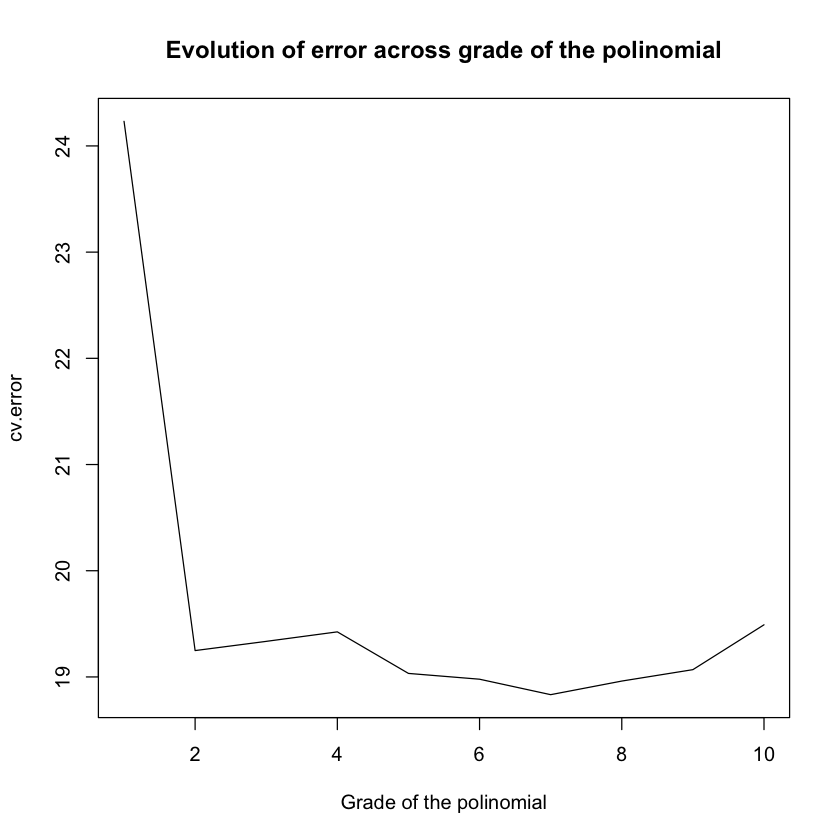

In [45]:

plot(cv.error,type="l",main="Evolution of error across grade of the polinomial",
     xlab="Grade of the polinomial")






# k-Fold Cross-Validation

The cv.glm() function can also be used to implement k-fold CV. Below we use k = 10, a common choice for k, on the Auto data set. We once again set a random seed and initialize a vector in which we will store the CV errors corresponding to the polynomial fits of orders one to ten.


In [46]:


set.seed(17)
cv.error.10 <- rep(0,10)
for(i in 1:10){
  glm.fit <- glm(mpg ~ poly(horsepower, i), data= Auto)
  cv.error.10[i] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
cv.error.10



[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520



Notice that the computation time is shorter than that of LOOCV. (In principle, the computation time for LOOCV for a least squares linear model should be faster than for k-fold CV, due to the availability of the formula (5.2) for LOOCV; however, unfortunately the cv.glm() function does not make use of this formula.) We still see little evidence that using cubic or higher-order polynomial terms leads to lower test error than simply using a quadratic fit.

We saw in Section 5.3.2 that the two numbers associated with delta are essentially the same when LOOCV is performed. When we instead perform k-fold CV, then the two numbers associated with delta differ slightly. The first is the standard k-fold CV estimate, as in (5.3). The second is a bias- corrected version. On this data set, the two estimates are very similar to each other.


# Practical exercises

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

## Exercise 1 

(a) Fit a logistic regression model that uses income and balance to predict default.

(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
i. Split the sample set into a training set and a validation set.
ii. Fit a multiple logistic regression model using only the train-
ing observations.
iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

## Exercise 2

In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. 

You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

(c) Use the model from (b) to predict the direction of the first obser- vation. You can do this by predicting that the first observation will go up if P (Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

(d) Write a `for` loop `from i=1 to i=n`, where $n$ is the number of observations in the data set, that performs each of the following steps:
i. Fit a logistic regression model using all but the ith obser- vation to predict Direction using Lag1 and Lag2.
ii. Compute the posterior probability of the market moving up for the ith observation.
iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

## Exercise 3

We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

set.seed (1)
x <- rnorm (100)
y <- x - 2 * x^2 + rnorm(100)

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

(b) Create a scatterplot of X against Y . Comment on what you find.

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i. $Y = \beta_0 + \beta_1 X + \epsilon$
ii. $Y = \beta_0 + \beta_1 X + \beta_2 X^2  + \epsilon$
iii. $Y = \beta_0 + \beta_1X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$
iv. $Y = \beta_0 + \beta_1X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

(f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?



In [47]:
system("jupyter nbconvert --to html_toc Sesion8ModelAssessmentAndSelection.ipynb")
